In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

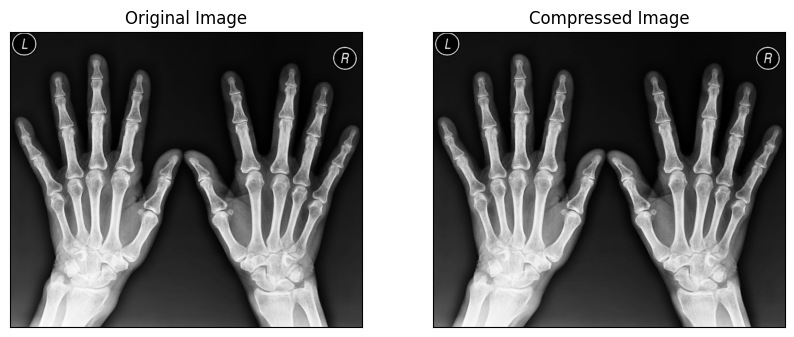

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('hands.jpg', cv2.IMREAD_GRAYSCALE)


fourier_transform = np.fft.fft2(image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)


threshold = 1000
filtered_fourier_transform = fourier_transform_shifted.copy()
filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0


compressed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image'), plt.xticks([]), plt.yticks([])
plt.show()


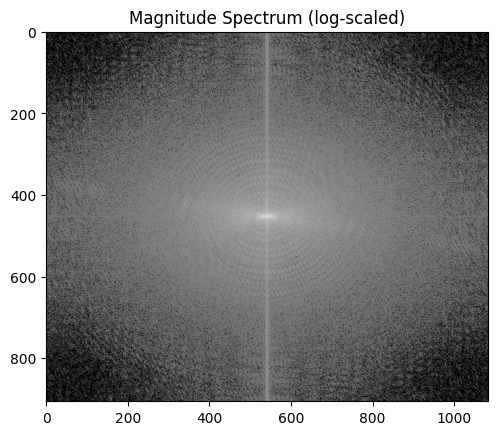

In [3]:

magnitude_spectrum = np.log(np.abs(filtered_fourier_transform) + 1)  # Apply log to enhance visualization


plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (log-scaled)')
plt.show()


In [8]:


original_image = cv2.imread('hands.jpg')


noise = np.random.normal(0, 25, original_image.shape).astype(np.uint8)  # Adjust noise parameters as needed

degraded_image = cv2.add(original_image, noise)


cv2.imwrite('hands.jpg', degraded_image)




True

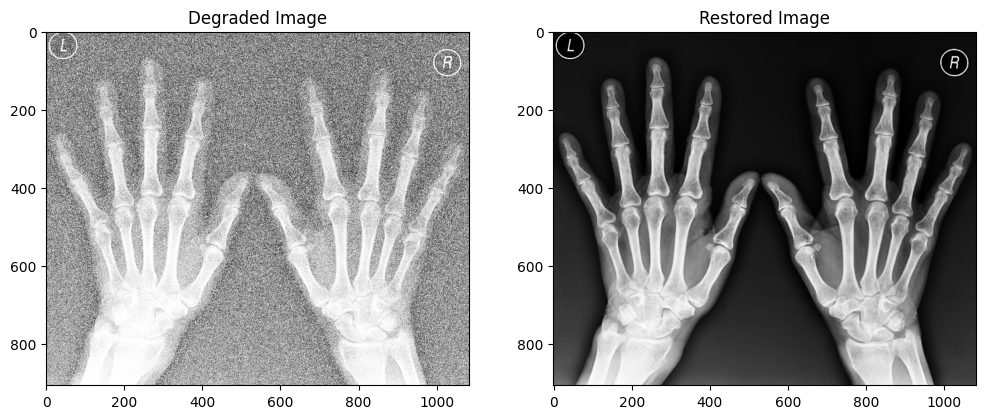

In [9]:



degraded_image = cv2.imread('hands.jpg', cv2.IMREAD_GRAYSCALE)


fourier_transform_original = np.fft.fft2(image)
fourier_transform_shifted_original = np.fft.fftshift(fourier_transform_original)

fourier_transform_degraded = np.fft.fft2(degraded_image)
fourier_transform_shifted_degraded = np.fft.fftshift(fourier_transform_degraded)


epsilon = 1e-6
inverse_filter = np.divide(fourier_transform_original, fourier_transform_degraded + epsilon)


restored_image_frequency_domain = fourier_transform_degraded * inverse_filter


restored_image = np.abs(np.fft.ifft2(np.fft.ifftshift(restored_image_frequency_domain)))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')
plt.show()


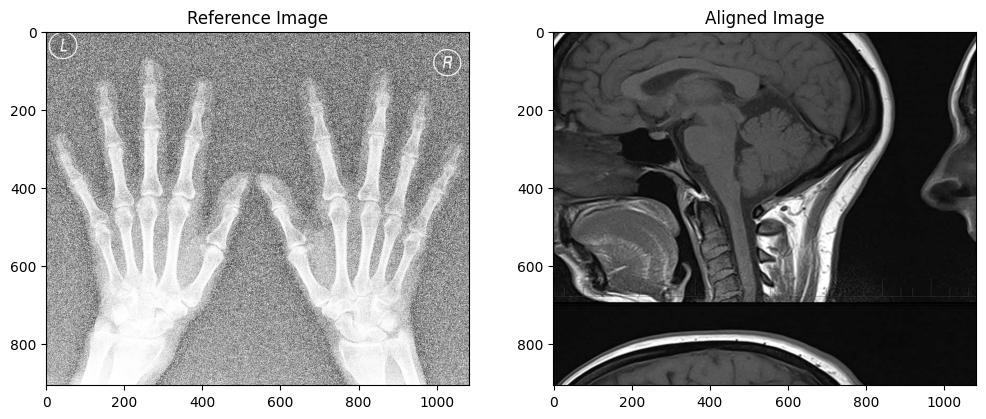

In [10]:



reference_image = cv2.imread('hands.jpg', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('brain.jpg', cv2.IMREAD_GRAYSCALE)


target_image_resized = cv2.resize(target_image, (reference_image.shape[1], reference_image.shape[0]))


fourier_transform_reference = np.fft.fft2(reference_image)
fourier_transform_shifted_reference = np.fft.fftshift(fourier_transform_reference)

fourier_transform_target = np.fft.fft2(target_image_resized)
fourier_transform_shifted_target = np.fft.fftshift(fourier_transform_target)


cross_power_spectrum = fourier_transform_shifted_reference * np.conj(fourier_transform_shifted_target)


phase_correlation = np.fft.ifft2(cross_power_spectrum / (np.abs(cross_power_spectrum) + 1e-6))


shifted_peak = np.unravel_index(np.argmax(np.abs(phase_correlation)), phase_correlation.shape)
x_shift, y_shift = shifted_peak[1], shifted_peak[0]


aligned_image = np.roll(target_image_resized, (y_shift, x_shift), axis=(0, 1))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reference_image, cmap='gray')
plt.title('Reference Image')
plt.subplot(1, 2, 2)
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Image')
plt.show()


TASK 2

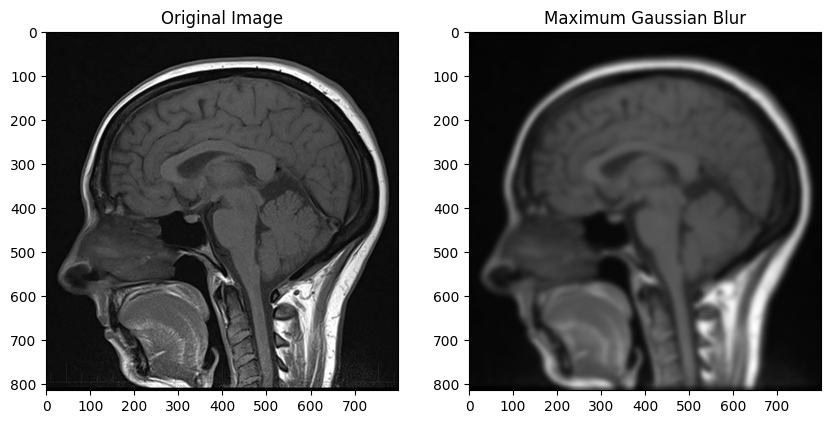

In [12]:



image = cv2.imread('brain.jpg', cv2.IMREAD_GRAYSCALE)


blurred_image_max = cv2.GaussianBlur(image, (35, 35), 0)  # Larger kernel size (35,35)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(blurred_image_max, cmap='gray')
plt.title('Maximum Gaussian Blur')
plt.show()


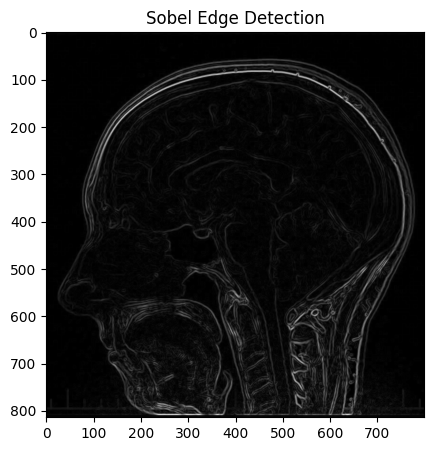

In [13]:

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)


gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)


plt.figure(figsize=(10, 5))
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()


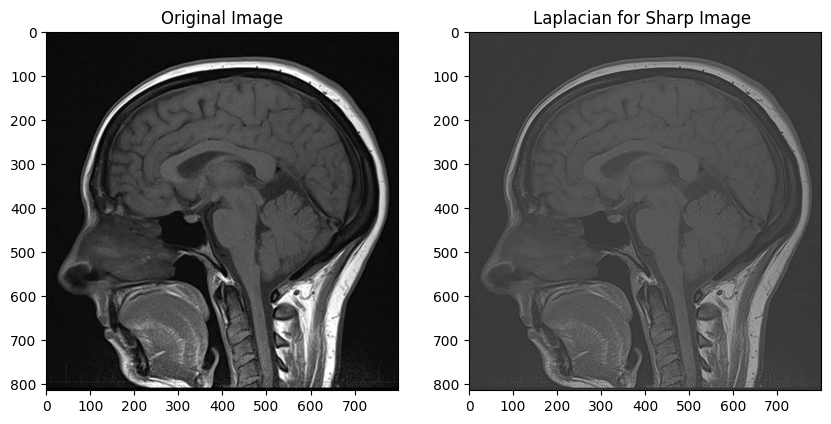

In [15]:

laplacian = cv2.Laplacian(image, cv2.CV_64F)


sharpened_image = image - laplacian


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Laplacian for Sharp Image ')
plt.show()


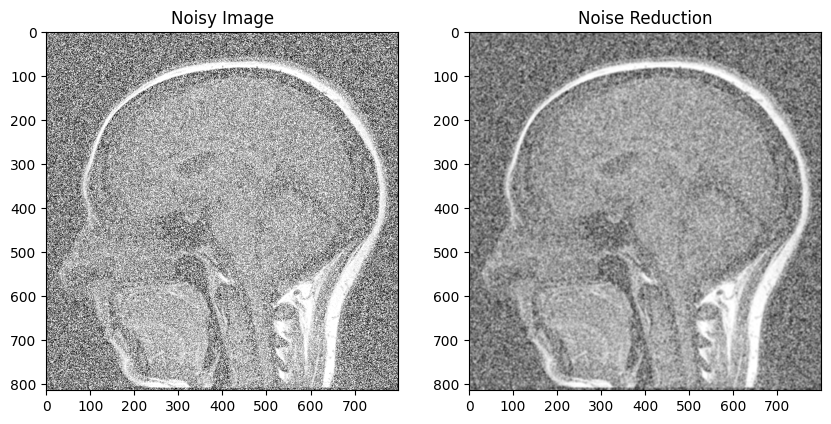

In [20]:

noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)


mean_filtered_image = cv2.blur(noisy_image, (5, 5))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 2, 2)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Noise Reduction')
plt.show()


TASK 3

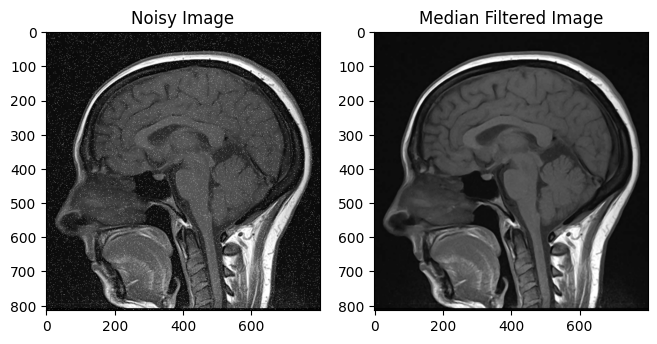

In [21]:



image = cv2.imread('brain.jpg', cv2.IMREAD_GRAYSCALE)


noise_density = 0.02
salt_pepper = np.random.random(image.shape) < noise_density
image[salt_pepper] = 0
image[salt_pepper] = 255


median_filtered_image = cv2.medianBlur(image, 5)


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.show()


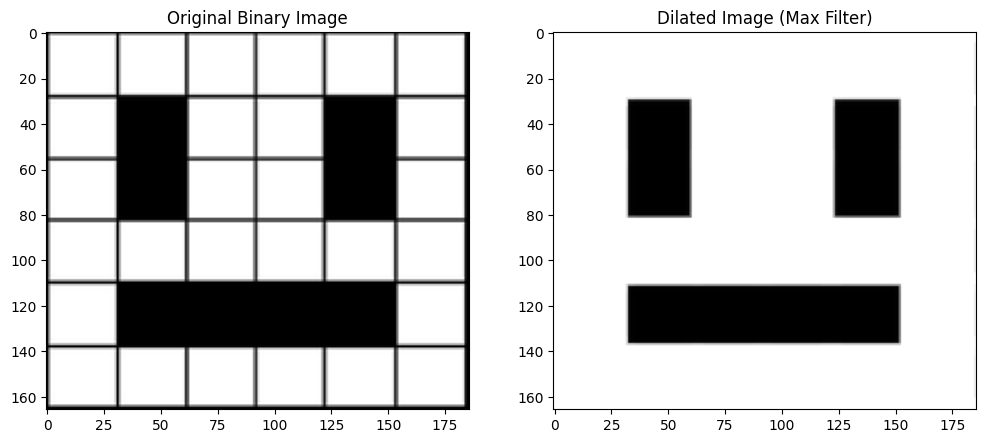

In [22]:



binary_image = cv2.imread('binary.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image (Max Filter)')
plt.show()


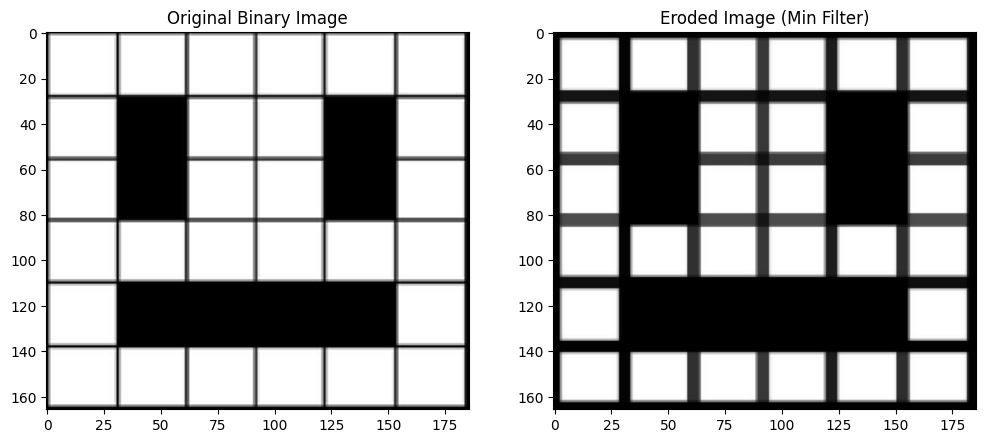

In [23]:



binary_image = cv2.imread('binary.png', cv2.IMREAD_GRAYSCALE)


kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image (Min Filter)')
plt.show()


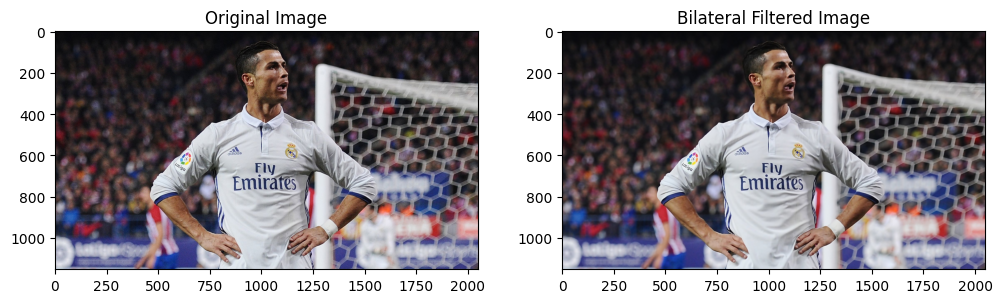

In [24]:



image = cv2.imread('goat.jpg')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

bilateral_filtered_image = cv2.bilateralFilter(image_rgb, 9, 75, 75)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image)
plt.title('Bilateral Filtered Image')
plt.show()


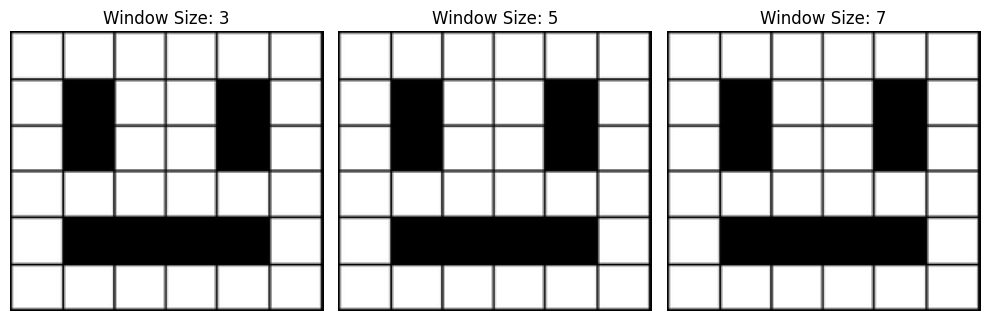

In [25]:



noisy_image = cv2.imread('binary.png', cv2.IMREAD_GRAYSCALE)

window_size = 3
max_window_size = 7

plt.figure(figsize=(10, 10))

while window_size <= max_window_size:

    median_filtered_image = cv2.medianBlur(noisy_image, window_size)


    min_val = np.min(median_filtered_image)
    max_val = np.max(median_filtered_image)
    median_val = np.median(median_filtered_image)


    condition1 = (median_val - min_val) < 32
    condition2 = (max_val - median_val) < 32
    adaptive_filtered_image = np.where(condition1 & condition2, median_filtered_image, noisy_image)


    plt.subplot(3, 3, window_size // 2)
    plt.imshow(adaptive_filtered_image, cmap='gray')
    plt.title(f'Window Size: {window_size}')
    plt.axis('off')

    window_size += 2

plt.tight_layout()
plt.show()


TASK 4

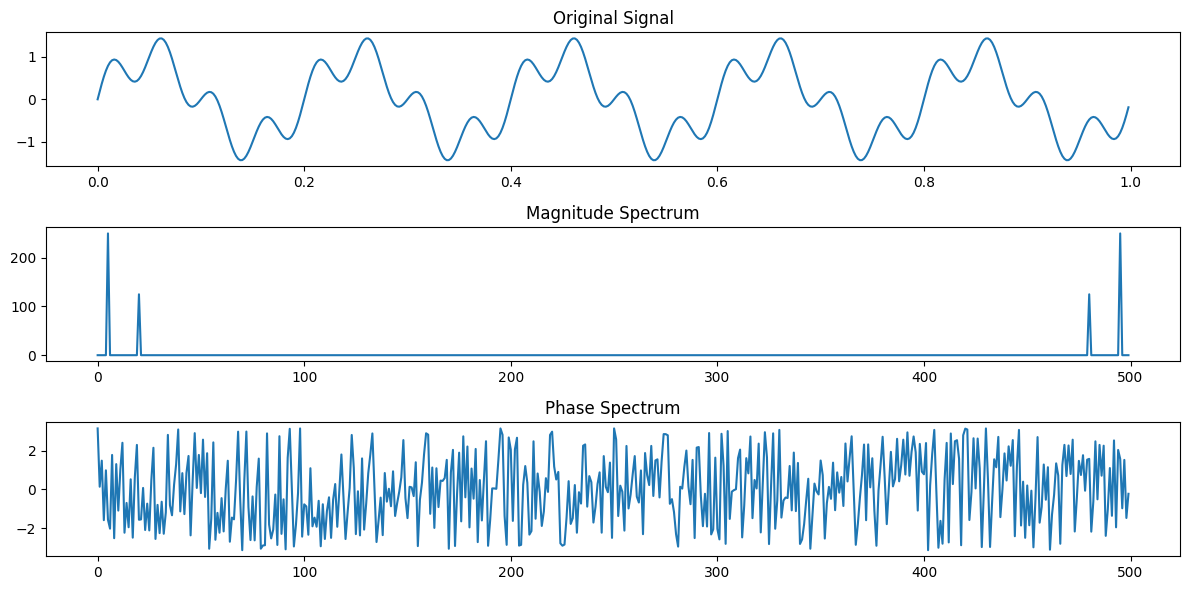

In [26]:



t = np.linspace(0, 1, 500, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)


fourier_transform = np.fft.fft(signal)
magnitude_spectrum = np.abs(fourier_transform)
phase_spectrum = np.angle(fourier_transform)

#
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.subplot(3, 1, 2)
plt.plot(magnitude_spectrum)
plt.title('Magnitude Spectrum')
plt.subplot(3, 1, 3)
plt.plot(phase_spectrum)
plt.title('Phase Spectrum')
plt.tight_layout()
plt.show()


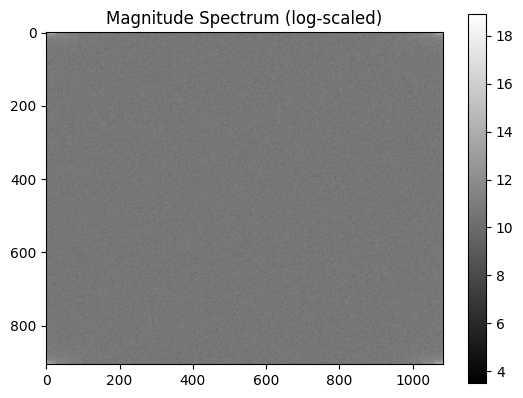

In [27]:

image = cv2.imread('hands.jpg', cv2.IMREAD_GRAYSCALE)
fourier_transform = np.fft.fft2(image)
magnitude_spectrum = np.abs(fourier_transform)
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title('Magnitude Spectrum (log-scaled)')
plt.colorbar()
plt.show()


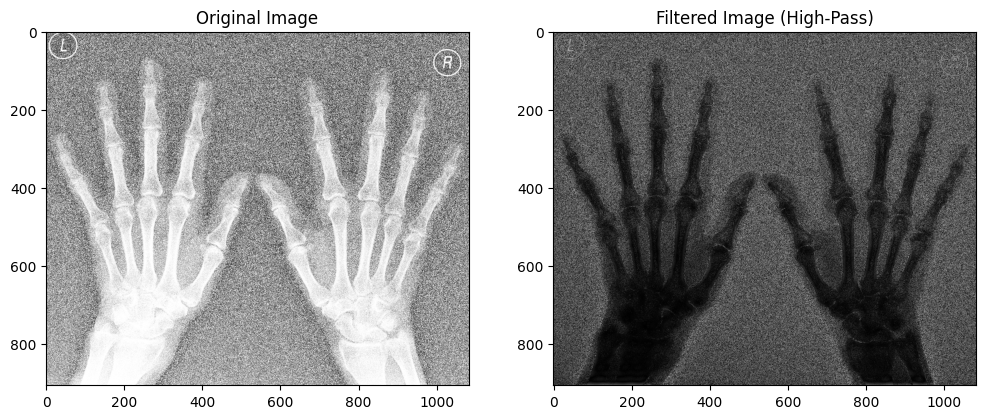

In [28]:


image = cv2.imread('hands.jpg', cv2.IMREAD_GRAYSCALE)
fourier_transform = np.fft.fft2(image)
shifted_fourier_transform = np.fft.fftshift(fourier_transform)
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 0

filtered_fourier_transform = shifted_fourier_transform * mask
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.show()


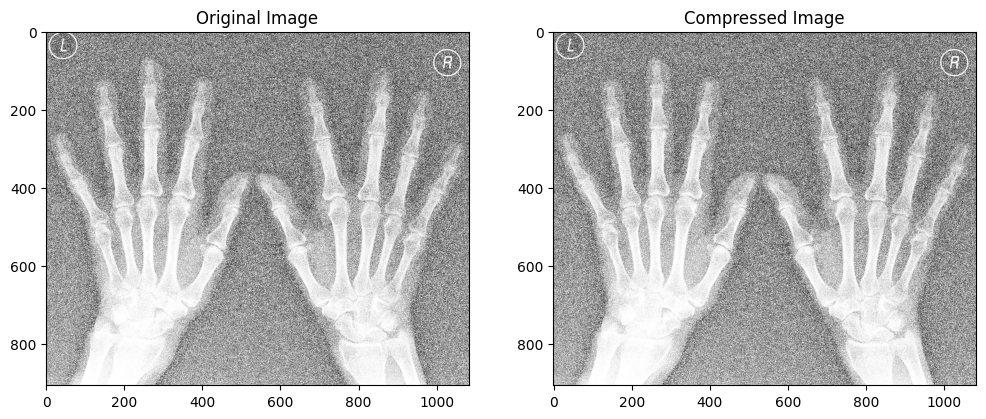

In [29]:

image = cv2.imread('hands.jpg', cv2.IMREAD_GRAYSCALE)

fourier_transform = np.fft.fft2(image)

threshold = 1000
filtered_fourier_transform = fourier_transform.copy()
filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0
compressed_image = np.abs(np.fft.ifft2(filtered_fourier_transform))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.show()


TASK 5

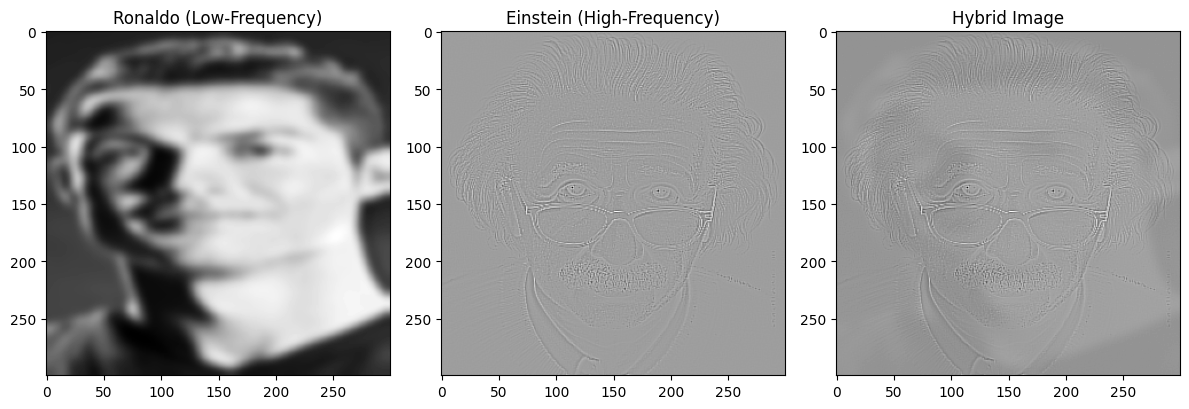

In [30]:


einstein_image = cv2.imread('goatp.jpg')
einstein_image = cv2.resize(einstein_image, (300,300))
newton_image = cv2.imread('einstein.jpg')
newton_image = cv2.resize(newton_image,(300,300))

einstein_gray = cv2.cvtColor(einstein_image, cv2.COLOR_BGR2GRAY)
newton_gray = cv2.cvtColor(newton_image, cv2.COLOR_BGR2GRAY)
einstein_low_pass = cv2.GaussianBlur(einstein_gray, (25, 25), 0)
newton_high_pass = cv2.Laplacian(newton_gray, cv2.CV_64F, ksize=3)
hybrid_image = einstein_low_pass + newton_high_pass

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(einstein_low_pass, cmap='gray')
plt.title('Ronaldo (Low-Frequency)')

plt.subplot(1, 3, 2)
plt.imshow(newton_high_pass, cmap='gray')
plt.title('Einstein (High-Frequency)')

plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')

plt.tight_layout()
plt.show()
